In [3]:
import pandas as pd
import numpy as np
import os
import glob
import chardet
import joblib
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [4]:
curr_path = 'C:/Users/cheng/Desktop/DSA3101/DSA3101_project/All Linear model/2007 model/'
def get_encoding(file):
    with open(file, 'rb') as f:
        content = f.read(1000000)
    result = chardet.detect(content)
    return result['encoding']

In [5]:
data_2007 = pd.read_csv("2007.csv", encoding="mac_roman")

In [9]:
## Function to group time
def bin_time(crs_time):
    if crs_time == 2400:
        return 3
    return crs_time // 600


## Functin to get season based on month 
def get_season(month):
    season_dict = {(1,2,3): 'spring', (4,5,6): 'summer', (7,8,9): 'autumn', (10,11,12): 'winter'}
    for key, val in season_dict.items():
        if month in key:
            return val

In [10]:
## Data preprocessing 
data_2007['SEASON'] = data_2007['MONTH'].apply(get_season)
data_2007['CRS_DEP_BIN'] = data_2007['CRS_DEP_TIME'].apply(bin_time)   
## Definition of delay is more than 60 mins
data_2007['HAS_DEP_DELAY'] = data_2007['DEP_DELAY_GROUP'].apply(lambda x: 1 if x > 3 else 0)

In [11]:
## Select columns 
regression_variables = ['DAY_OF_WEEK', 'DISTANCE', 'CRS_DEP_BIN', 'PRCP_ORIGIN', 
                        'SNOW_ORIGIN', 'SNWD_ORIGIN', 'TMAX_ORIGIN', 'TMIN_ORIGIN', 'HAS_DEP_DELAY', 'DEP_DELAY']
data_2007 = data_2007[regression_variables]
data_2007 = data_2007.dropna()

In [12]:
## Train test split
X_variables = ['DAY_OF_WEEK', 'DISTANCE', 'CRS_DEP_BIN', 'PRCP_ORIGIN', 'SNOW_ORIGIN', 
               'SNWD_ORIGIN', 'TMAX_ORIGIN', 'TMIN_ORIGIN']
X_data = data_2007[X_variables]
y_data = data_2007['DEP_DELAY']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2)


In [13]:
## Linear Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

Text(0.5, 0, 'linear regression regressor coefficient for departure delay')

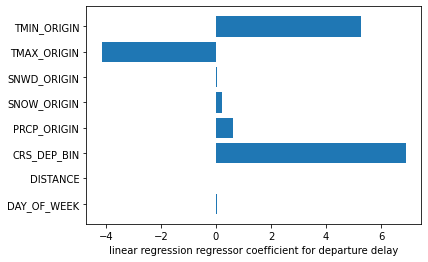

In [14]:
## Plot regressor varaible weights
plt.barh(lm.feature_names_in_, lm.coef_)
plt.xlabel("linear regression regressor coefficient for departure delay")